<a href="https://colab.research.google.com/github/Harsh-COE/ML/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

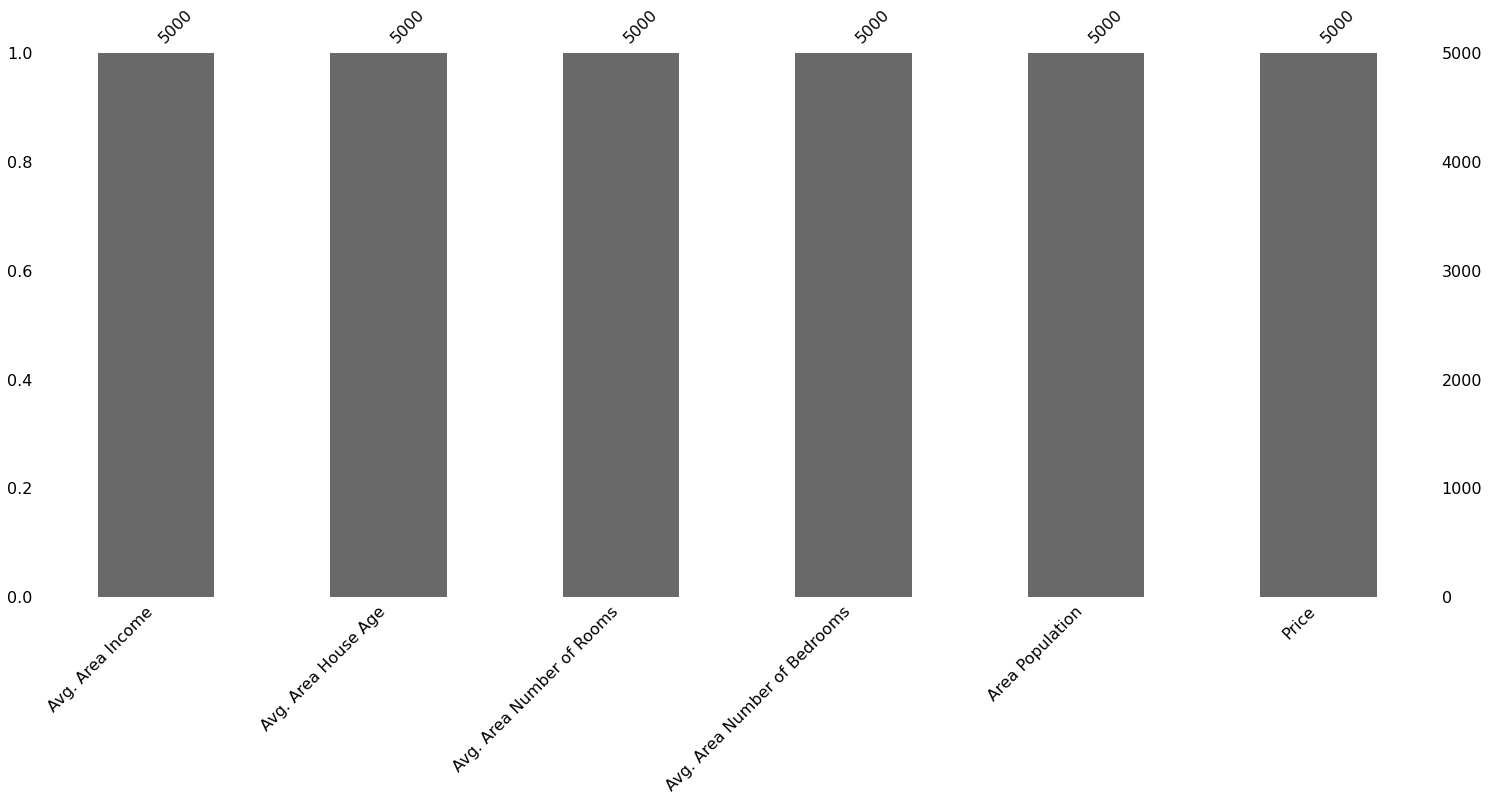

In [7]:

import pandas as pd

# A PART
#Examine the values of each attribute and Select a set of attributes only that would affect to predict future bike buyers to 
#create your input for data mining algorithms. Remove all the unnecessaryattributes. (Select features just by analysis).
df=pd.read_csv('USA_Housing.csv')
import missingno as ms

ms.bar(df)


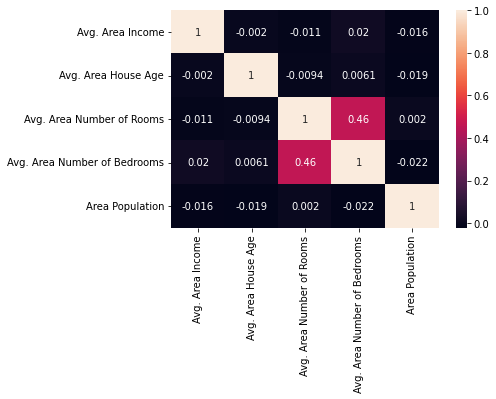

In [8]:
import seaborn as sns

sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

In [9]:
import numpy as np

X=df.iloc[:,0:5]

Y=df.iloc[:,5]

Y=np.array(Y)

Y=Y.reshape(-1,1)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [11]:
A=X_train.T.dot(X_train)

B=np.linalg.inv(A)

C=B.dot(X_train.T)

beta=C.dot(y_train)

print(beta)

[[1231278.63687691]
 [ 230464.52520478]
 [ 164159.19982569]
 [ 120514.71328324]
 [   2913.62424674]
 [ 151019.35865134]]


In [12]:
y_predict=X_test.dot(beta)

print(y_predict)

[[1308536.13611172]
 [1237122.72747115]
 [1243835.6280953 ]
 ...
 [1457119.79300222]
 [1483428.9529654 ]
 [1047510.59741982]]


In [13]:
error=y_test-y_predict

square_error=np.power(error,2)

sum_square_error=np.sum(square_error)

mean_square_error=sum_square_error/len(y_predict)

print(mean_square_error)

rms_error=np.sqrt(mean_square_error)

print(rms_error)

y_mean=np.mean(y_test)

total_variance=np.sum((y_test-y_mean)**2)

print(1-sum_square_error/total_variance)

10068422549.495707
100341.52953536091
0.9146818498916266
